In [1]:
import numpy as np
import pandas as pd
responses = pd.read_csv("responses.csv", index_col=False)

In [2]:
responses = responses.dropna() # Drop nulls

In [3]:
# Preparing data
music = responses.iloc[:,1:19]
movies = responses.iloc[:,19:31]
interests = responses.iloc[:,31:46]
hobbies = responses.iloc[:,46:63]
phobias = responses.iloc[:,63:73]
health = responses.iloc[:,73:76]
traits = responses.iloc[:,76:133]
spending = responses.iloc[:,133:140]
demographics = responses.iloc[:,140:150]
frames = [traits,phobias]
traits_phobias = pd.concat(frames,axis=1)

In [4]:
import seaborn as sns

In [5]:
R = traits.iloc[:,:].corr() # Correlation between traits
R.style.background_gradient().set_precision(2)

In [6]:
R2 = phobias.iloc[:,:].corr() # Correlation betweeen Phobias
R2.style.background_gradient().set_precision(2)

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
Flying,1,0.32,0.19,0.27,0.12,0.24,0.18,0.13,0.16,0.16
Storm,0.32,1,0.49,0.25,0.26,0.29,0.25,0.13,0.31,0.054
Darkness,0.19,0.49,1,0.3,0.32,0.25,0.29,0.19,0.23,0.15
Heights,0.27,0.25,0.3,1,0.19,0.21,0.19,0.087,0.2,0.11
Spiders,0.12,0.26,0.32,0.19,1,0.45,0.39,0.14,0.22,0.14
Snakes,0.24,0.29,0.25,0.21,0.45,1,0.57,0.14,0.36,0.15
Rats,0.18,0.25,0.29,0.19,0.39,0.57,1,0.21,0.4,0.13
Ageing,0.13,0.13,0.19,0.087,0.14,0.14,0.21,1,0.28,0.086
Dangerous dogs,0.16,0.31,0.23,0.2,0.22,0.36,0.4,0.28,1,0.17
Fear of public speaking,0.16,0.054,0.15,0.11,0.14,0.15,0.13,0.086,0.17,1


In [7]:
# Drop Non numbers fields
traits.drop('Punctuality', axis=1, inplace=True)
traits.drop('Lying', axis=1, inplace=True)
traits.drop('Internet usage', axis=1, inplace=True)

In [8]:
import matplotlib.pyplot as plt

In [9]:
import networkx as nx # the main libary we will use

In [10]:
# Now we will create our first Network of only the traits. 

corr = traits.T.corr() # Correlation of people (Transposing the Matrix)
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2',create_using=nx.Graph())

In [11]:
def plot_degree_dist(G):
    degree_hist = nx.degree_histogram(G) 
    degree_hist = np.array(degree_hist, dtype=float)
    degree_prob = degree_hist/G.number_of_nodes()
    plt.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.')
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title('Degree Distribution')
    plt.show()

In [12]:
def plot_clustering_coefficient(G):
    clustering_dict = {}
    for node in G.nodes():
        k = G.degree(node)
        if not k in clustering_dict:
            clustering_dict[k] = [nx.clustering(G,node)]
        else:
            clustering_dict[k].append(nx.clustering(G,node))
    k_lst = sorted(clustering_dict.keys())
    clustering_lst = []
    for k in k_lst:
        clustering_lst.append(np.array(clustering_dict[k]).mean())

    plt.loglog(k_lst,clustering_lst,'b.')
    plt.xlabel('k')
    plt.ylabel('C(k)')
    plt.title('Average clustering coefficient')
    plt.show()

In [13]:
def plot_knn(G, fit=True): 
    knn_dict = nx.k_nearest_neighbors(G) # k_nearest_neighbors return dict with knn for each k
    k_lst = sorted(knn_dict.keys())
    knn_lst = []
    for k in k_lst:
        knn_lst.append(knn_dict[k])
    plt.loglog(k_lst,knn_lst,'b.')
    
    if fit:
        # fit a*x^mu
        popt, pcov = curve_fit(fit_func, np.array(k_lst), np.array(knn_lst))
        plt.loglog(np.array(k_lst), fit_func(np.array(k_lst), *popt), '--', c='gray')
    
    plt.xlabel('k')
    plt.ylabel('knn(k)')
    plt.title('Average next neighbor degree')
    plt.show()

In [14]:
def print_attributes_and_plots(G):
    print (nx.info(G))
    if not nx.is_directed(G):
        if nx.is_connected(G):
            print ('Diameter: %s' % nx.diameter(G)) # print diameter of the network
            print ('Average shortest path length: %s' % nx.average_shortest_path_length(G, weight=None))
        else:
            print ('Size of largest component: %s' % len(max(nx.connected_components(G), key=len)))
            giant = max(nx.connected_component_subgraphs(G), key=len)
            print ('Average shortest path length of largest component: %s' % nx.average_shortest_path_length(giant, weight=None))
            
    print ('Degree Assortativity Coefficient (r): %s' % nx.degree_assortativity_coefficient(G))
    print ('Average Clustering Coefficient is: %s' % nx.average_clustering(G))
    plot_degree_dist(G)
    plot_knn(G, fit=False)
    if not nx.is_directed(G):
        plot_clustering_coefficient(G)

Name: 
Type: Graph
Number of nodes: 612
Number of edges: 4294
Average degree:  14.0327
Size of largest component: 608
Average shortest path length of largest component: 3.1360660712737363
Degree Assortativity Coefficient (r): 0.178514111348623
Average Clustering Coefficient is: 0.23776388078116403


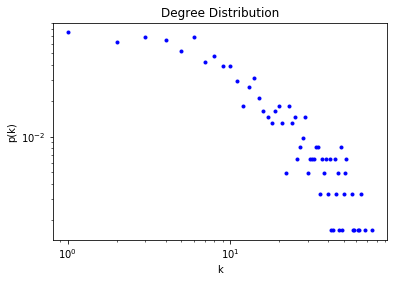

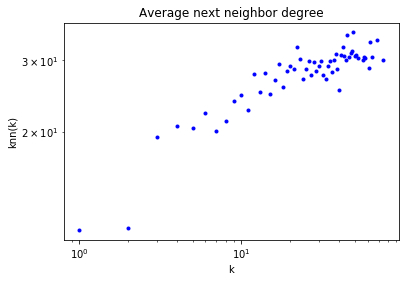

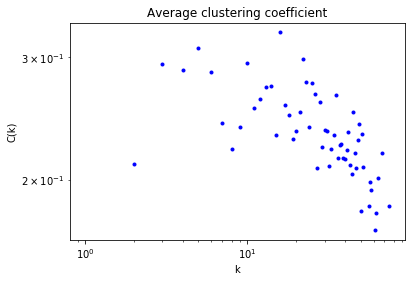

In [15]:
print_attributes_and_plots(G)

In [ ]:
------------------------------------------------------------------------

In [16]:
# Now we will create our second Network of only the Phobias. 

corr_phob = phobias.T.corr()
# Transform it in a links data frame (3 columns only):
links_phob = corr_phob.stack().reset_index()
links_phob.columns = ['var1', 'var2','value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_phob_filtered=links_phob.loc[ (links_phob['value'] > 0.7) & (links_phob['var1'] != links_phob['var2']) ]
 
# Build your graph
G2=nx.from_pandas_edgelist(links_phob_filtered, 'var1', 'var2',create_using=nx.Graph())

Name: 
Type: Graph
Number of nodes: 662
Number of edges: 7445
Average degree:  22.4924
Diameter: 8
Average shortest path length: 3.221718443628851
Degree Assortativity Coefficient (r): 0.537633267634203
Average Clustering Coefficient is: 0.38613548295612315


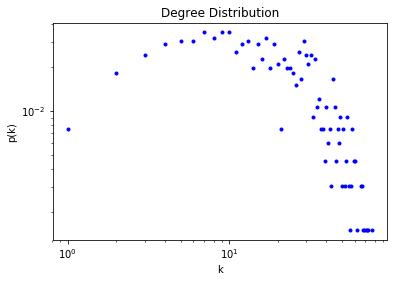

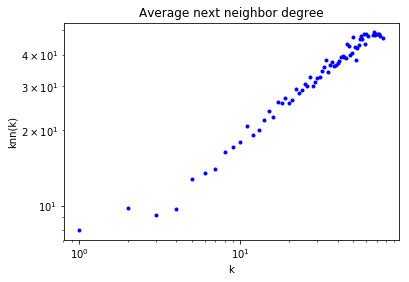

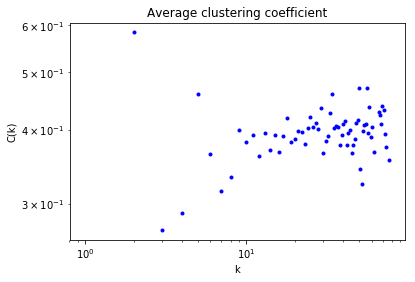

In [17]:
print_attributes_and_plots(G2)

In [ ]:
---------------------------------------------------------------------

In [24]:
# Our Final Network (3) - A network of both Phobias and Traits

# We had trouble with the joined dataframe so we created another csv file with only Phobias and Traits
Attribuetes_and_Phobias = pd.read_csv("Attribuetes_and_Phobias.csv", index_col=False) 
Attribuetes_and_Phobias = Attribuetes_and_Phobias.dropna() # Drop nulls

In [25]:
corr_Attribuetes_and_Phobias = Attribuetes_and_Phobias.T.corr()
# Transform it in a links data frame (3 columns only):
links_Attribuetes_and_Phobias = corr_Attribuetes_and_Phobias.stack().reset_index()
links_Attribuetes_and_Phobias.columns = ['var1', 'var2','value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_Attribuetes_and_Phobias_filtered=links_Attribuetes_and_Phobias.loc[ (links_Attribuetes_and_Phobias['value'] > 0.6) & (links_Attribuetes_and_Phobias['var1'] != links_Attribuetes_and_Phobias['var2']) ]
 
# Build your graph
G3=nx.from_pandas_edgelist(links_Attribuetes_and_Phobias_filtered, 'var1', 'var2',create_using=nx.Graph())

Name: 
Type: Graph
Number of nodes: 344
Number of edges: 657
Average degree:   3.8198
Size of largest component: 307
Average shortest path length of largest component: 4.602754891315918
Degree Assortativity Coefficient (r): 0.19077289377745293
Average Clustering Coefficient is: 0.13032169078452874


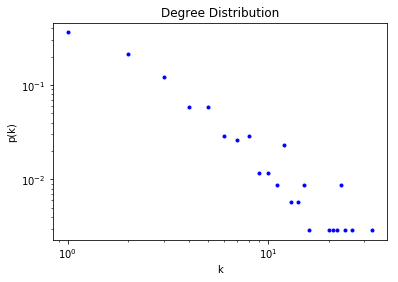

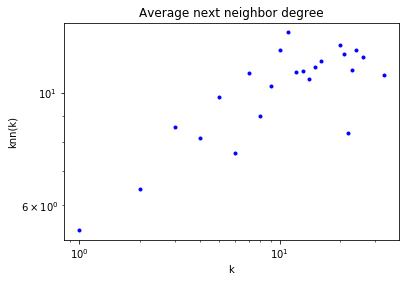

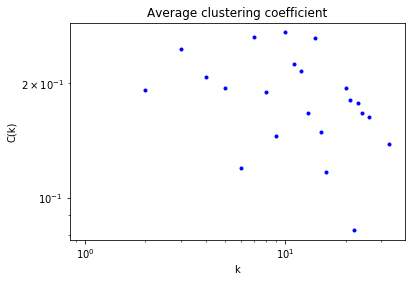

In [26]:
print_attributes_and_plots(G3)

In [ ]:
nx.write_gexf(G3,'Desktop/Phobias.gexf')